# 绘图

## 柱状图

### 多柱状图

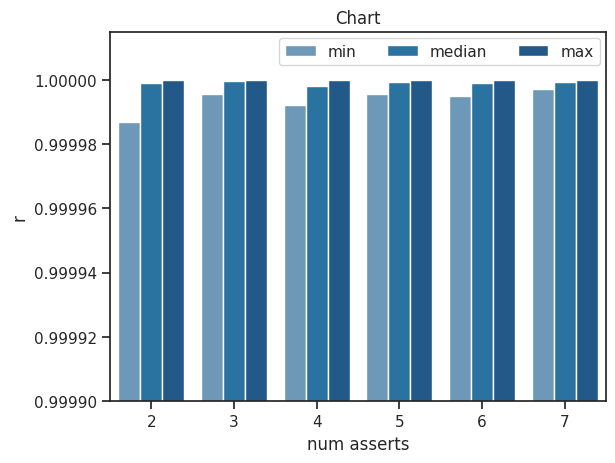

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
input_file_name = f"data/demo_pearson_corr.csv"
data = pd.read_csv(input_file_name)
# 选取特定的列
df = data[['num_assets', 'min', 'median', 'max']]
# 显示数据
#print(data)
# 重塑数据框
df_melt = df.melt('num_assets', var_name='Stat', value_name='Value')
# 显示重塑数据
#print(df_melt)
# 设置绘图风格
sns.set(style='ticks')
"""
whitegrid: 白色网格背景风格。
darkgrid: 黑色网格背景风格。
white: 白色背景风格，无网格。
dark: 黑色背景风格，无网格。
ticks: 白色背景风格，显示刻度线。
"""
# 创建
fig, ax = plt.subplots()
# 定义每根柱子的颜色，使用RGB元组
colors = [(97, 154, 195), (22, 119, 179), (17, 90, 154)]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]
# 绘制柱状图
sns.barplot(x='num_assets', y='Value', hue='Stat', data=df_melt, 
            palette=colors, ax=ax)
# 调整y轴的刻度范围, 设置刻度范围
ax.set_ylim(0.9999, 1.0000)
# 自定义y轴上的数值标签
# 设置自定义的刻度数量
num_ticks = 6
# 生成等间隔的刻度值
custom_y_ticks = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_ticks)
# 自定义y轴上的刻度标签
custom_y_labels = [f'{tick:.5f}' for tick in custom_y_ticks]
# 设置y轴刻度
plt.yticks(custom_y_ticks, custom_y_labels)
# 添加空间
plt.ylim(top=1.000015)  # 调整y轴的上限
# 添加图例，并设置水平显示
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=3, 
          borderaxespad=0.4)
"""
borderaxespad: 整体离边缘的距离
"""
# 设置图表标题和坐标轴标签
plt.title('Chart')
plt.xlabel('num asserts')
plt.ylabel('r')
# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
filename = f"result/demo_chart.png"
plt.savefig(filename, dpi=dpi, bbox_inches='tight')
# 显示图表
plt.show()


## 3D

### 3D surface

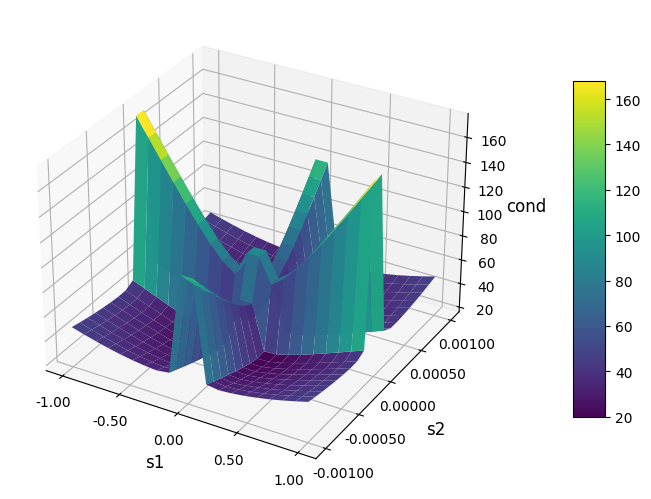

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import pandas as pd

num = 20
s1_bound = 1
s2_bound = 1e-3
s1_values = np.linspace(-s1_bound, s1_bound, num)  # 参数s1的取值
s2_values = np.linspace(-s2_bound, s2_bound, num)  # 参数s2的取值
# 假设你已经有了参数s1、s2和对应的指标值(cond)的数据
# 从文件中读取
s1_file_name = f"data/demo_s1.txt"
s2_file_name = f"data/demo_s2.txt"
cond_file_name = f"data/demo_cond.txt"
s1_values = np.loadtxt(s1_file_name)
s2_values = np.loadtxt(s2_file_name)
cond_values = np.loadtxt(cond_file_name)
# 转换数据为网格形式
s1_values, s2_values = np.meshgrid(s1_values, s2_values)
cond_values = np.array(cond_values)
# 设置默认设置
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')
# 创建图形对象和3D坐标系
#fig = plt.figure(figsize=(8, 6))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制指标值(cond)的曲面
surf1 = ax.plot_surface(s1_values, s2_values, cond_values, cmap='viridis', alpha=0.99)
# 创建 colorbar 轴对象
cbar_ax = fig.add_axes([1.0, 0.15, 0.05, 0.7])
"""
x位置, y位置, 宽度和高度
"""
# 添加colorbar
fig.colorbar(surf1, cax=cbar_ax)
# 调正 colorbar 的方位
fig.subplots_adjust(left=0.0, bottom=0.0, right=0.99, top=1.0)
# 自定义 x 轴和 y 轴的刻度
ticks_num = 5
xticks = np.linspace(-s1_bound, s1_bound, ticks_num)  # 自定义 x 轴刻度
xticklabels = [f'{tick:.2f}' for tick in xticks]  # 自定义 x 轴刻度标签
yticks = np.linspace(-s2_bound, s2_bound, ticks_num)  # 自定义 y 轴刻度
yticklabels = [f'{tick:.5f}' for tick in yticks]  # 自定义 y 轴刻度标签
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
# 设置 x 轴和 y 轴的 ticks 间距
pad = 2  # 间距大小，单位为 points
ax.tick_params(axis='x', which='major', pad=pad)
ax.tick_params(axis='y', which='major', pad=3)
# 自定义 x 轴和 y 轴的标签
labelpad = 10  # 间距大小，单位为 points
xlabel = 's1'
ylabel = 's2'
zlabel = 'cond'
fontdict = {'fontsize': 12, 'fontfamily': 'sans-serif'}  # 设置字体和大小  
ax.set_xlabel(xlabel, fontdict=fontdict)
ax.set_ylabel(ylabel, fontdict=fontdict, labelpad=9)
ax.set_zlabel(zlabel, fontdict=fontdict, labelpad=7)
# 保存图像为 PDF 格式
filename = f'result/demo_image.pdf'
# 保存图像为特定DPI
plt.savefig(filename, dpi=300, bbox_inches='tight')
# 显示图形
plt.show()
